## Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os,sys
import seaborn as sns
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
import re
from nltk import word_tokenize


## Load the dataset and do basic exploration of data


In [2]:
arr = os.listdir()
arr_csv = [x for x in os.listdir() if x.endswith(".csv")]
arr_csv

['IRAhandle_tweets_1.csv',
 'IRAhandle_tweets_2.csv',
 'IRAhandle_tweets_3.csv',
 'IRAhandle_tweets_4.csv',
 'IRAhandle_tweets_5.csv',
 'IRAhandle_tweets_6.csv',
 'IRAhandle_tweets_7.csv',
 'IRAhandle_tweets_8.csv',
 'IRAhandle_tweets_9.csv']

## Combine csv files

In [3]:

df_raw = pd.concat((pd.read_csv(f) for f in arr_csv))
print(df_raw.shape)
df_raw.tail()

(2973371, 15)


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
37550,3.093874e+09,_YOUR_LIFESTYLE,Санкционный пинг-понг http://t.co/Jz06cndR8q,Unknown,Uzbek,9/7/2015 1:31,9/7/2015 1:31,60,4,412,NaN,Russian,0,0,NonEnglish
37551,3.093874e+09,_YOUR_LIFESTYLE,Горизонтальный кальян NanoSmoke http://t.co/rL...,Unknown,Russian,9/8/2015 14:49,9/8/2015 14:49,60,4,416,NaN,Russian,0,0,NonEnglish
37552,3.093874e+09,_YOUR_LIFESTYLE,Фотограф Kai-Hendrik Schroeder http://t.co/q0x...,Unknown,Russian,9/9/2015 18:52,9/9/2015 18:52,60,4,418,NaN,Russian,0,0,NonEnglish
37553,3.093874e+09,_YOUR_LIFESTYLE,К чему стремится компания Netflix (США) http:/...,Unknown,Russian,9/9/2015 22:26,9/9/2015 22:27,60,4,419,NaN,Russian,0,0,NonEnglish
37554,3.093874e+09,_YOUR_LIFESTYLE,В Петербурге появилось вегетарианское кафе в к...,Unknown,Russian,9/9/2015 8:17,9/9/2015 8:17,60,4,417,NaN,Russian,0,0,NonEnglish


## Detecting the datatypes of columns

In [4]:
df_raw.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973371 entries, 0 to 37554
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   external_author_id  float64
 1   author              object 
 2   content             object 
 3   region              object 
 4   language            object 
 5   publish_date        object 
 6   harvested_date      object 
 7   following           int64  
 8   followers           int64  
 9   updates             int64  
 10  post_type           object 
 11  account_type        object 
 12  new_june_2018       int64  
 13  retweet             int64  
 14  account_category    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 363.0+ MB


In [5]:
df_raw.describe(include='all')

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
count,2.973367e+06,2973371,2973370,2964528,2973371,2973371,2973371,2.973371e+06,2.973371e+06,2.973371e+06,1310946,2973008,2.973371e+06,2.973371e+06,2973371
unique,NaN,2848,2365942,36,56,896684,906316,NaN,NaN,NaN,2,20,NaN,NaN,8
top,NaN,EXQUOTE,В городе Сочи. Олимпиада – праздник или стихий...,United States,English,8/16/2017 1:29,3/22/2016 17:35,NaN,NaN,NaN,RETWEET,Russian,NaN,NaN,NonEnglish
freq,NaN,59652,670,2055882,2128963,202,1333,NaN,NaN,NaN,1270702,721191,NaN,NaN,837725
mean,1.296128e+17,NaN,NaN,NaN,NaN,NaN,NaN,3.433524e+03,7.018913e+03,1.049756e+04,NaN,NaN,2.078735e-01,4.408955e-01,NaN
std,3.036341e+17,NaN,NaN,NaN,NaN,NaN,NaN,5.609881e+03,1.458463e+04,1.768729e+04,NaN,NaN,4.057859e-01,4.964945e-01,NaN
min,3.497640e+07,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,-1.000000e+00,-1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.930748e+09,NaN,NaN,NaN,NaN,NaN,NaN,3.270000e+02,3.200000e+02,1.787000e+03,NaN,NaN,0.000000e+00,0.000000e+00,NaN
50%,2.581835e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.499000e+03,1.274000e+03,4.333000e+03,NaN,NaN,0.000000e+00,0.000000e+00,NaN
75%,3.254274e+09,NaN,NaN,NaN,NaN,NaN,NaN,4.730000e+03,1.060000e+04,1.234100e+04,NaN,NaN,0.000000e+00,1.000000e+00,NaN


## Counting missing data from columns

In [6]:
df_raw.isna().sum().sort_values(ascending = False)

post_type             1662425
region                   8843
account_type              363
external_author_id          4
content                     1
account_category            0
retweet                     0
new_june_2018               0
updates                     0
followers                   0
following                   0
harvested_date              0
publish_date                0
language                    0
author                      0
dtype: int64

In [7]:
df_raw.dropna(subset = ['content'], inplace = True)
df_raw.isna().sum().sort_values(ascending = False)

post_type             1662424
region                   8843
account_type              363
external_author_id          4
account_category            0
retweet                     0
new_june_2018               0
updates                     0
followers                   0
following                   0
harvested_date              0
publish_date                0
language                    0
content                     0
author                      0
dtype: int64

## Dropping columns that was found not useful by intial analysis

In [8]:

df = df_raw.drop(['external_author_id', 'harvested_date'], axis=1)

In [9]:
df.head()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,NaN,Right,0,0,RightTroll
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


## Getting english only data

In [10]:
df_e=df.loc[df['language']=='English',:]

In [11]:
df.shape

(2973370, 13)

In [12]:
df_e.shape

(2128962, 13)

In [13]:
df_e.isna().sum().sort_values(ascending = False)

post_type           1272847
region                 1145
account_type            354
account_category          0
retweet                   0
new_june_2018             0
updates                   0
followers                 0
following                 0
publish_date              0
language                  0
content                   0
author                    0
dtype: int64

## Analyzing english only dataframe

In [14]:
df_e['region'].value_counts()
# df_e['region'].value_counts().sum()

United States                1849686
Unknown                       246934
United Kingdom                 16664
Azerbaijan                      7614
Germany                         1285
Russian Federation              1146
Italy                           1125
Canada                           600
Belarus                          494
Afghanistan                      461
Iraq                             459
Israel                           409
United Arab Emirates             371
Ukraine                          231
Spain                             72
France                            67
Egypt                             59
Sweden                            43
Mexico                            41
Iran, Islamic Republic of         20
Greece                            14
Finland                            8
Malaysia                           4
Latvia                             3
Serbia                             2
Czech Republic                     2
Switzerland                        1
H

## Visualizing and analysing numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6877D8388>,
      dtype=object)

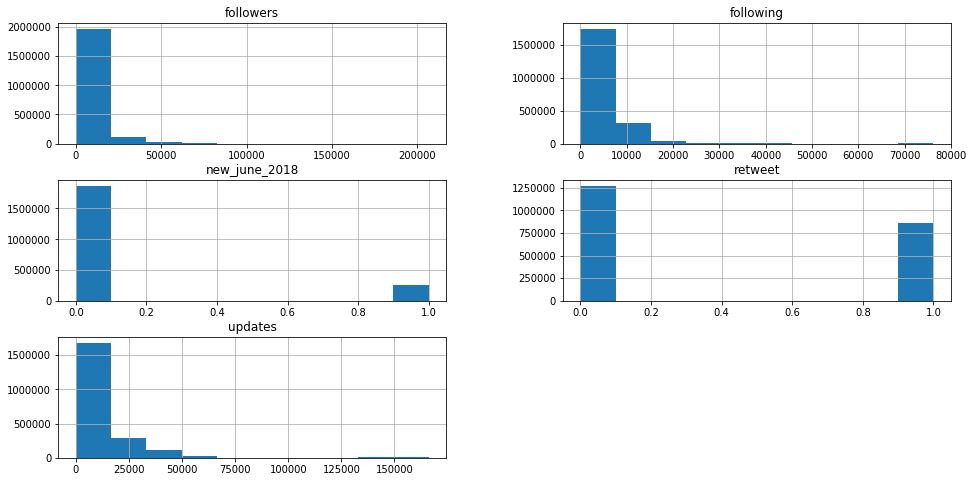

In [15]:
df_e.hist(figsize = (16,8))

## Visualizing and Analyzing  categorical features

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


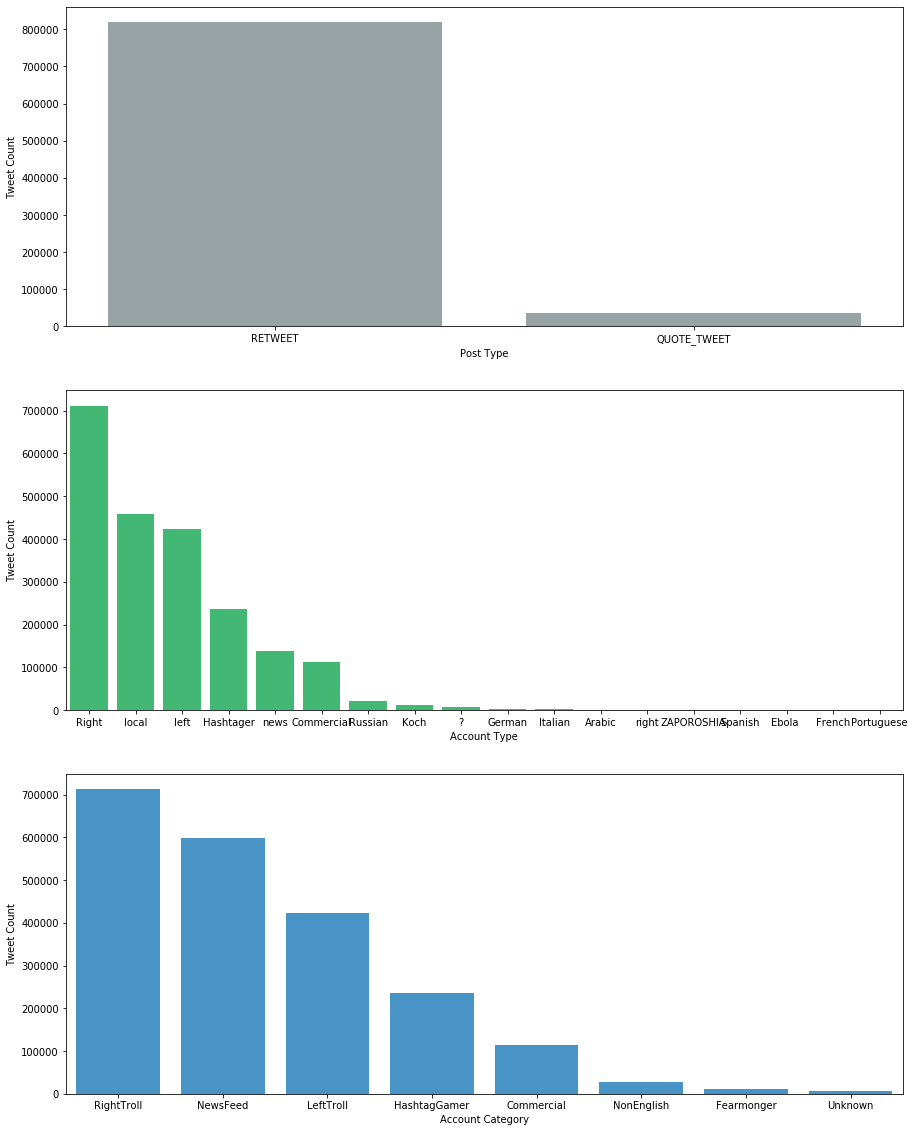

In [16]:

fig, ax =plt.subplots(3,1)
sns.countplot(df_e['post_type'], ax=ax[0], color='#95a5a6', order=df_e['post_type'].value_counts().index)
sns.countplot(df_e['account_type'], ax=ax[1], color='#2ecc71', order=df_e['account_type'].value_counts().index)
sns.countplot(df_e['account_category'], ax=ax[2], color='#3498db', order=df_e['account_category'].value_counts().index)
ax[0].set_xlabel('Post Type')
ax[1].set_xlabel('Account Type')
ax[2].set_xlabel('Account Category')
ax[0].set_ylabel('Tweet Count')
ax[1].set_ylabel('Tweet Count')
ax[2].set_ylabel('Tweet Count')
fig.set_size_inches(15, 20)
fig.show()

## Visulizing Account_category

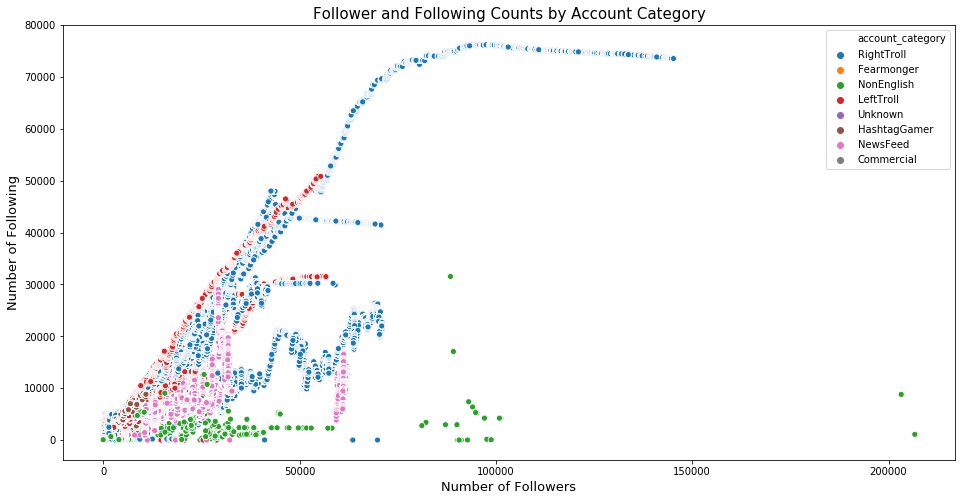

In [17]:

plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="followers", y="following", hue="account_category",data=df_e)
plt.title('Follower and Following Counts by Account Category', fontsize = 15)
plt.xlabel('Number of Followers', fontsize = 13)
plt.ylabel('Number of Following', fontsize = 13)
plt.legend(loc = 'best')

## Cleaning the text data in column content

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\M S
[nltk_data]     IYER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
def preprocess(text):
    text = text.lower()
    
    text_p = "".join([char for char in text if char not in string.punctuation])
    
    words = word_tokenize(text_p)
    
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]
        
    return filtered_words

In [20]:
eng_data=df_e.copy()

In [21]:
eng_data['content'] = eng_data['content'].apply(lambda x:preprocess(x))

In [22]:
eng_data['content'].head()

0    [sitting, democrat, us, senator, trial, corrup...
1    [marshawn, lynch, arrives, game, antitrump, sh...
2    [daughter, fallen, navy, sailor, delivers, pow...
3    [president, trump, dedicates, presidents, cup,...
4    [19000, respecting, national, anthem, standfor...
Name: content, dtype: object